# ANA 522 Fundamental of Programming
## Orthodontics Treatment Plan Prediction 

### Abstract

This study aims for the possibility of the application of machine learning techniques to automate orthodontic treatment planning through analysis of oral scan data. Using a dataset of nearly 5,000 patient scans from December 2023 to January 2024, we employed YOLO object detection to identify individual teeth and construct dental arches. From dentist interviews, we identified that the discrepancy between the actual teeth arch length and the ideal teeth arch length is one of the most important factors in determining a treatment plan. Therefore, we focused on analyzing the treatment plan and arch length discrepancy (calculated as the difference between the detected arch length and the simulated arch length). This analysis revealed that this variable is effective in distinguishing between Basic/Pro and Regrettable/Invisalign categories, though not among individual treatments. The findings suggest that while arch length discrepancy is a significant predictor for broad treatment categories, additional features may be necessary for more granular treatment plan classification. This research demonstrates the potential for automated analysis tools to assist orthodontists in treatment planning, while highlighting areas where human expertise remains essential.


### Introduction

Accurate treatment planning is critical for successful patient outcomes in orthodontics, but the process is still highly reliant on manual analysis of oral scans. 
The task is time intensive and prone to inconsistency due to variability in image quality, anatomical differences and subjective interpretation. 
As digital imaging and data driven approaches have become more common, statistical modeling and machine learning offer promising methods for automating classification of oral scans into treatment categories. These techniques can enhance efficiency, scalability and accuracy in orthodontic workflows by decreasing reliance on manual processes.

The potential of machine learning in orthodontic applications has been described in previous studies. For example, Wang et al. (2023) used machine learning models to classify dental radiographs and demonstrated how automated methods can help with clinical decision making. Although the bulk of the existing research revolves around radiographs, this project generalizes the application to oral scans, which have distinct features and challenges. This work aims to discover patterns in oral scan data with statistical modeling and machine learning techniques to build classification models that would aid in orthodontic diagnosis and treatment planning. The outcomes of this research are intended to facilitate the integration of automated tools in orthodontic practice and to encourage data driven decision making.

### Data Analysis

We conducted comprehensive exploratoly data analysis to explore the characteristics of the dataset and identify patterns relevant to the research objectives. The analysis includes descriptive statistics to summarize key features of the data, detection of outliers to understand data quality, and visualizations to highlight significant relationships and distributions. 

For this project, I selected a dataset focused on orthodontic image analysis, specifically involving upper arch images of oral scans categorized into four distinct treatment types.

I initially applied image processing techniques, including YOLO object detection, to analyze oral images from almost 5,000 patients, captured between December 2023 and January 2024. Through this processing, I identified each tooth, determined the center point for each detected tooth, and constructed both a detected arch and a simulated arch. The dataset includes each patient’s treatment plan, the number of teeth, and detailed measurements of arch length, making it a strong foundation for building a classification model based on these extracted features.

This comprehensive set of annotated and processed data supports the analysis and classification of orthodontic cases, providing valuable insights and features for model training. At this EDA, we mainly focus on detected arch and arch length discrepancy because this is a key variable and factor to determin the arch adjustment treatment in industry. 

#### sample of scanned image

Sample Oral Image:


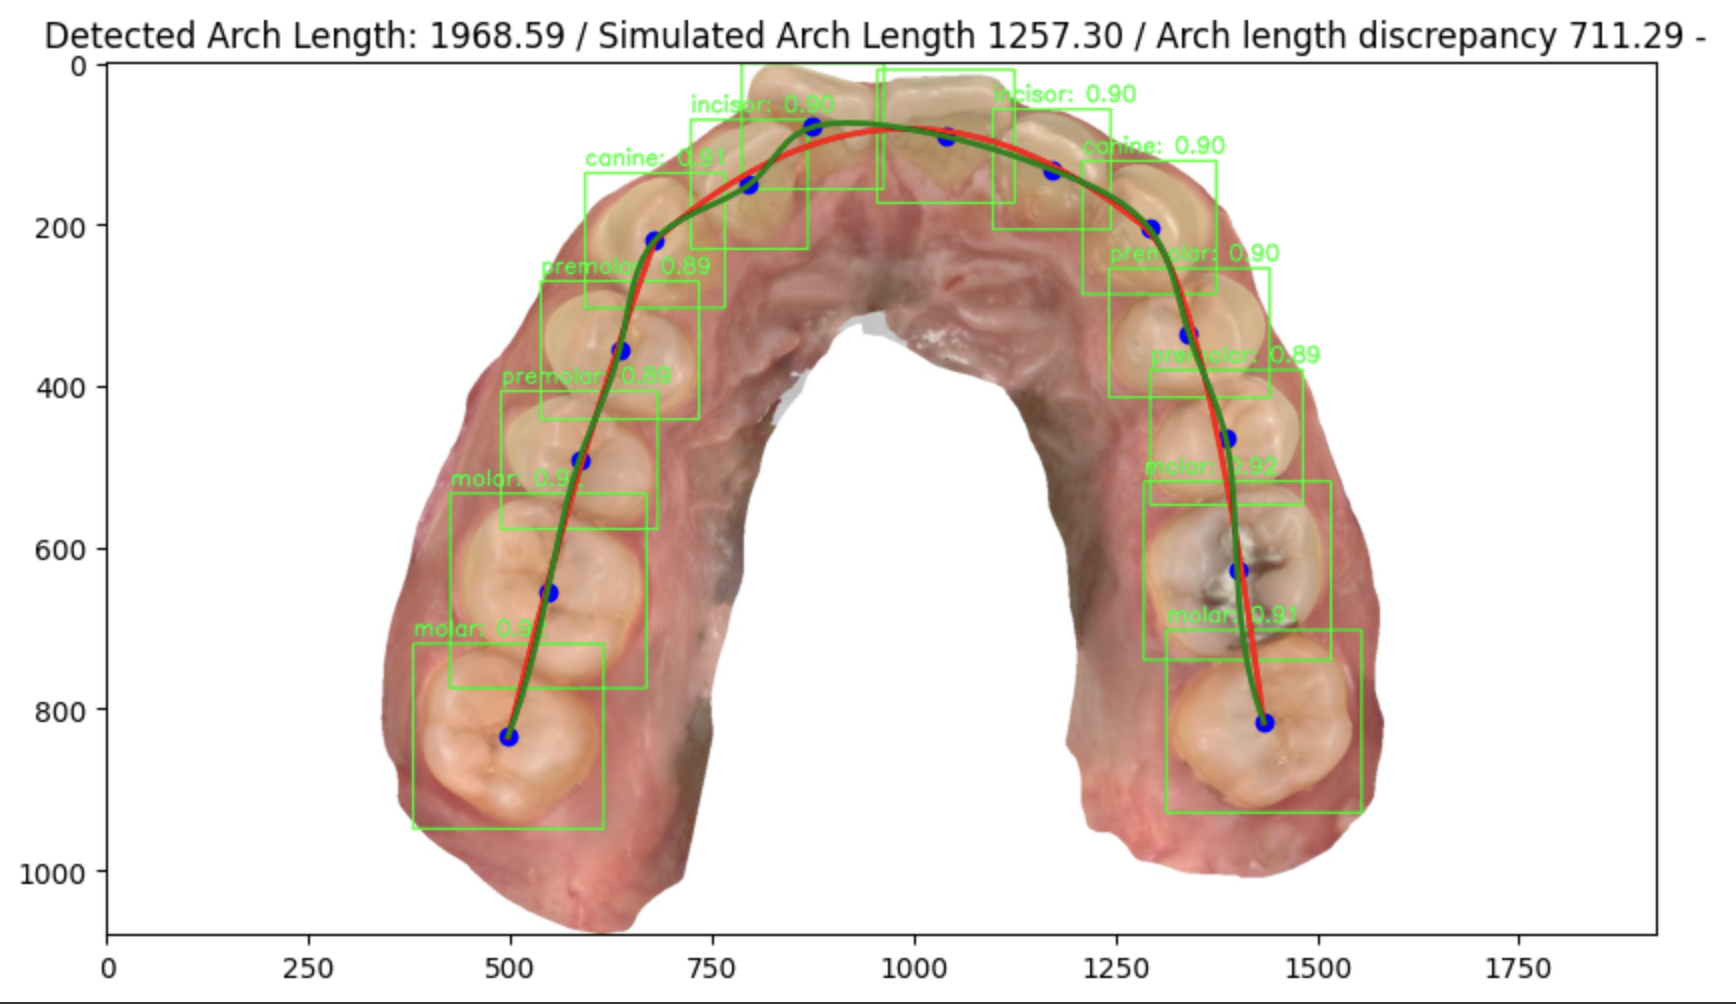

In [1]:
from IPython.display import Image, display
print('Sample Oral Image:')
display(Image(filename='/Users/nkohei/Workspace/McDaniel-Repository/522/final project/image.png'))


In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In this dataset, we observed 4999 patients with no missing values. Because we use object detection for each tooth, then created detected arch length by connecting each object's center points, it potentially contains many outliners. Because of that, we conducted z-score outliner detection analysis and successfully we get rid of 70 patients as outliner from dataset.

Given dataset, we want to predict label class for each patient's dental image by these variables. 


#### dataset

  | Variable Name | Description | Type (Continuous/Categorical) |
  |--------------|-------------|------------------------------|
  | detected arch length       | the length of detected teeth arch   | Continuous                      |
  | simulated arch length       | the length of simulated teeth arch   | Continuous                      |
  | arch length discrepancy       | the discreapancy between detected teeth arch and simulated teeth arch  | Continuous                      |
  | label       | treatment plan   | Categorical                      |
  | num_incisors       | the number of detected incisor   | Continuous                      |
  | num_canines       | the number of detected canine   | Continuous                      |
  | num_premolar       | the number of detected premolar   | Continuous                      |
  | num_molar       | the number of detected molar   | Continuous                      |
  | avg_confidence_incisor       | the confidence of object detection   | Continuous                      |
  | avg_confidence_canine       | the confidence of object detection   | Continuous                      |
  | avg_confidence_premolar       | the confidence of object detection   | Continuous                      |
  | avg_confidence_molar       | the confidence of object detection   | Continuous                      |



Dataset size:
(4999, 12)

Number of missing values per column:
detected_arch_length       0
simulated_arch_length      0
arch_length_discrepancy    0
label                      0
num_incisors               0
num_canines                0
num_premolars              0
num_molars                 0
avg_confidence_incisor     0
avg_confidence_canine      0
avg_confidence_premolar    0
avg_confidence_molar       0
dtype: int64
Total observation after outliner detection


/var/folders/t6/jzgwrdks2vq53w20jlljrk840000gn/T/ipykernel_80985/2109853154.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['all_tooth_exist'] = np.where(
/var/folders/t6/jzgwrdks2vq53w20jlljrk840000gn/T/ipykernel_80985/2109853154.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['arch_discrepancy_severity'] = pd.cut(


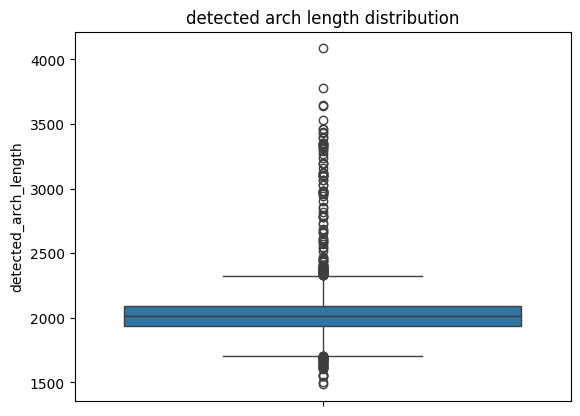

In [3]:
df = pd.read_csv('/Users/nkohei/Workspace/McDaniel-Repository/522/final project/dataset.csv')
df = df.iloc[:,1:]

print("\nDataset size:")
print(df.shape)

print("\nNumber of missing values per column:")
print(df.isna().sum())

z_scores = stats.zscore(df['detected_arch_length'])
outliers = abs(z_scores) > 3

df['detected_arch_length_outliers_flg'] = outliers
df[df['detected_arch_length_outliers_flg']]
sns.boxplot(df['detected_arch_length'])
plt.title('detected arch length distribution')

df_cleaned = df[~df['detected_arch_length_outliers_flg']]

print('Total observation after outliner detection')
df_cleaned.shape[0]

df_cleaned['all_tooth_exist'] = np.where(
    (df_cleaned['num_incisors'] == 4) & 
    (df_cleaned['num_canines'] == 2) & 
    (df_cleaned['num_premolars'] == 4) & 
    (df_cleaned['num_molars'] == 4), 
    'all_detected', 
    'missing_or_extracted'
)

df_cleaned['arch_discrepancy_severity'] = pd.cut(
    df_cleaned['arch_length_discrepancy'],  # Column to categorize
    bins=4,  # Number of equal-width bins
    labels=['low', 'medium', 'high', 'very_high']  # Custom labels
)



From dentist interviews, we identified that the discrepancy between the actual teeth arch length and the ideal teeth arch length is one of the most important factors in determining a treatment plan. Therefore, we focused on analyzing the treatment plan and arch length discrepancy (calculated as the difference between the detected arch length and the simulated arch length). This analysis revealed that this variable is effective in distinguishing between Basic/Pro and Regrettable/Invisalign categories, though not among individual treatments.

Given the details of the treatment plans and the research questions, we determined that more features, specifically those including back tooth (molar and premolar) condition data, are needed to distinguish Pro and Basic plans. Since back tooth conditions directly relate to chewing issues (e.g., occlusion), we propose developing an occlusal class feature based on left and right side angle images.

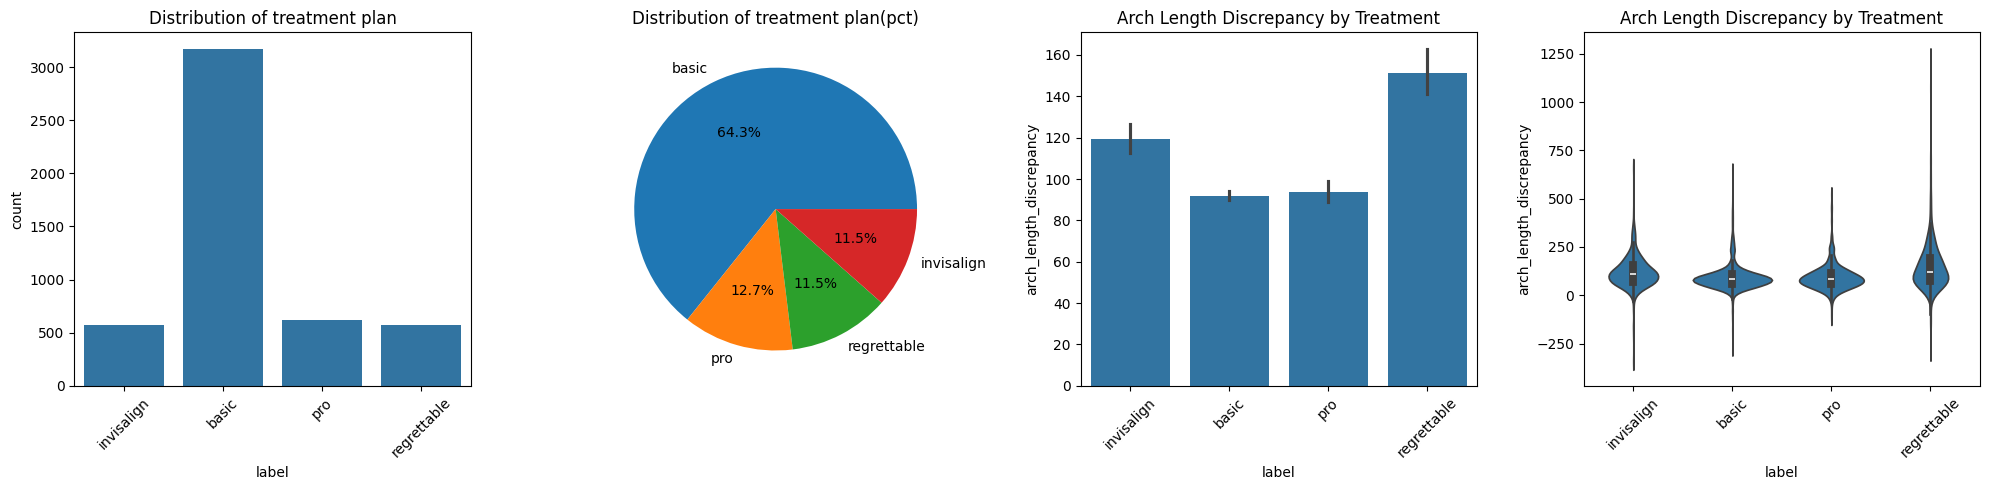

In [4]:
# Create a figure with 4 subplots side by side
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 5))

sns.countplot(data=df_cleaned, x='label', ax=ax1)
ax1.set_title('Distribution of treatment plan')
ax1.tick_params(axis='x', rotation=45)

pie_se = df_cleaned['label'].value_counts()
ax2.pie(pie_se.values, labels=pie_se.index, autopct='%1.1f%%')
ax2.set_title('Distribution of treatment plan(pct)')

# Bar Plot
sns.barplot(data=df_cleaned, x='label', y='arch_length_discrepancy', ax=ax3)
ax3.set_title('Arch Length Discrepancy by Treatment')
ax3.tick_params(axis='x', rotation=45)

sns.violinplot(data=df_cleaned, x='label', y='arch_length_discrepancy', ax=ax4)
ax4.set_title('Arch Length Discrepancy by Treatment')
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

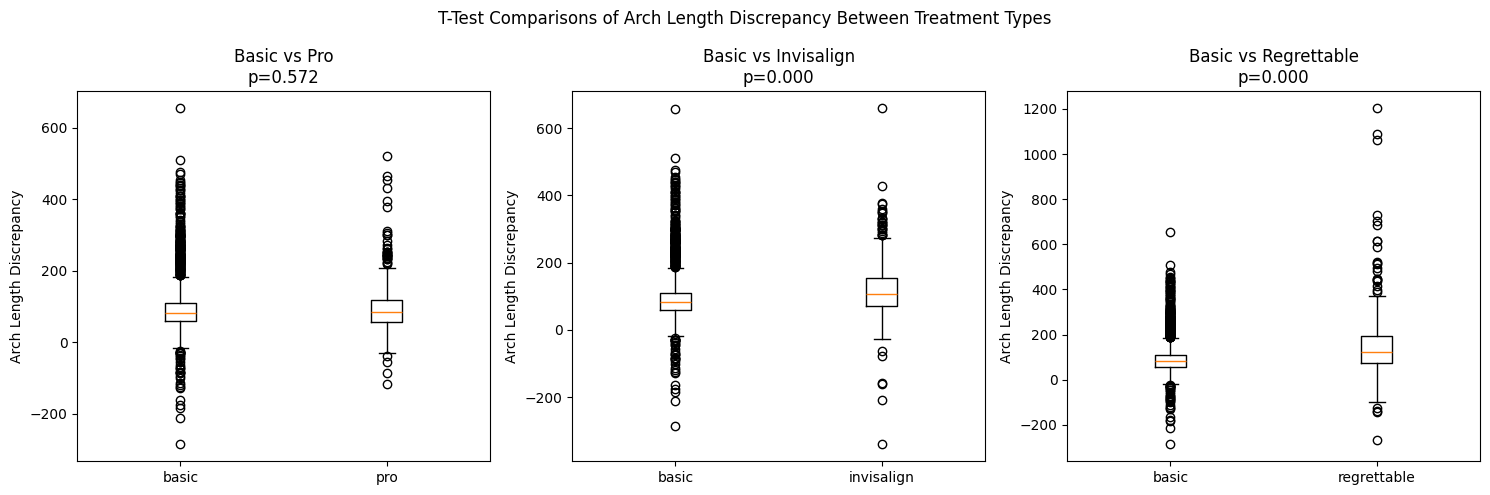


T-test results for basic vs pro:
t-statistic: -0.565
p-value: 0.572

T-test results for basic vs invisalign:
t-statistic: -8.902
p-value: 0.000

T-test results for basic vs regrettable:
t-statistic: -16.647
p-value: 0.000


F_onewayResult(statistic=np.float64(107.55344653758648), pvalue=np.float64(1.899824063528475e-67))

In [5]:
# Perform t-tests between basic and other treatment types
comparisons = [
    ('basic', 'pro'),
    ('basic', 'invisalign'), 
    ('basic', 'regrettable')
]

# Create figure for visualizing t-test results
fig, axes = plt.subplots(1, len(comparisons), figsize=(15, 5))
fig.suptitle('T-Test Comparisons of Arch Length Discrepancy Between Treatment Types')

for i, (group1, group2) in enumerate(comparisons):
    # Perform t-test
    ttest_result = stats.ttest_ind(
        df_cleaned[df_cleaned['label'] == group1]['arch_length_discrepancy'],
        df_cleaned[df_cleaned['label'] == group2]['arch_length_discrepancy']
    )
    
    # Create box plot comparison
    data = [
        df_cleaned[df_cleaned['label'] == group1]['arch_length_discrepancy'],
        df_cleaned[df_cleaned['label'] == group2]['arch_length_discrepancy']
    ]
    
    # Plot boxplot
    axes[i].boxplot(data, tick_labels=[group1, group2])
    axes[i].set_title(f'{group1.title()} vs {group2.title()}\np={ttest_result.pvalue:.3f}')
    axes[i].set_ylabel('Arch Length Discrepancy')
    
plt.tight_layout()
plt.show()

# Print detailed t-test results
for group1, group2 in comparisons:
    ttest_result = stats.ttest_ind(
        df_cleaned[df_cleaned['label'] == group1]['arch_length_discrepancy'],
        df_cleaned[df_cleaned['label'] == group2]['arch_length_discrepancy']
    )
    print(f"\nT-test results for {group1} vs {group2}:")
    print(f"t-statistic: {ttest_result.statistic:.3f}")
    print(f"p-value: {ttest_result.pvalue:.3f}")
    
    
labels = ['basic', 'pro', 'invisalign', 'regrettable']
discrepancies_by_label = [df_cleaned[df_cleaned['label'] == label]['arch_length_discrepancy'] for label in labels]
label_anova = stats.f_oneway(*discrepancies_by_label)
label_anova



Cross Validation Results(Basic vs Invisalign):
Accuracy: 0.8096 (+/- 0.0180)
Precision: 0.1641 (+/- 0.0749)
Recall: 0.1631 (+/- 0.0754)
F1 Score: 0.1630 (+/- 0.0717)
Cross Validation Results(Basic vs Regrettable):
Accuracy: 0.8188 (+/- 0.0212)
Precision: 0.2729 (+/- 0.0300)
Recall: 0.2620 (+/- 0.0313)
F1 Score: 0.2671 (+/- 0.0276)


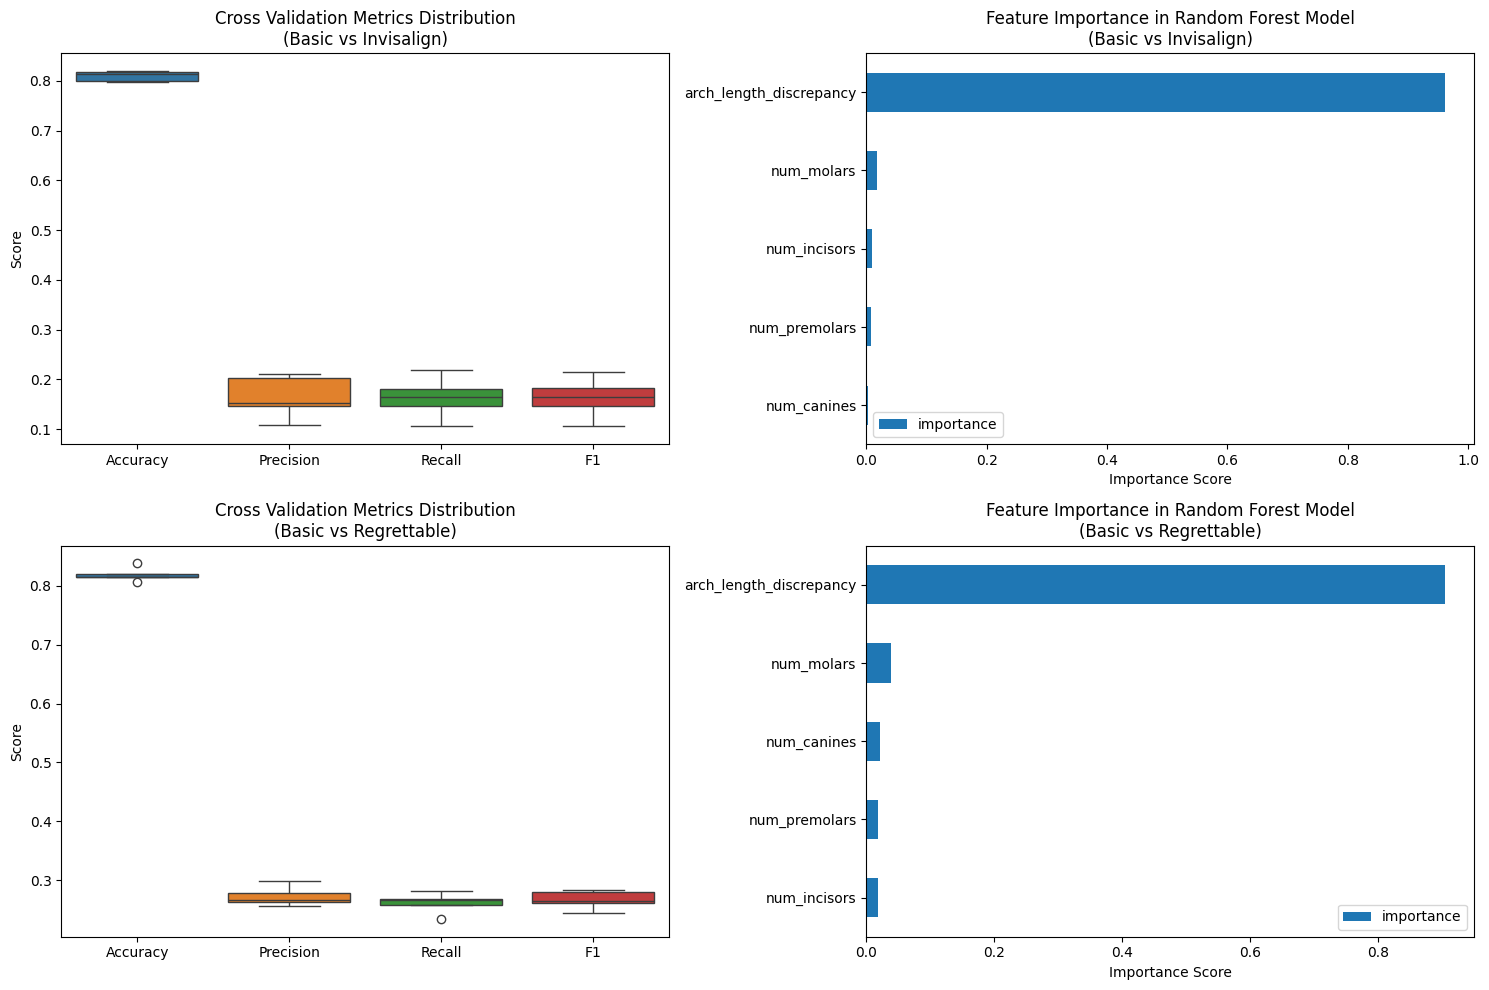

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate, KFold

X = df[['arch_length_discrepancy', 'num_incisors', 'num_canines', 'num_premolars', 'num_molars']]
y = (df['label'] == 'invisalign').astype(int)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

cv = KFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision', 
    'recall': 'recall',
    'f1': 'f1'
}

cv_results = cross_validate(rf_model, X, y, cv=cv, scoring=scoring)

# Create a figure with 1 row and 2 columns
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# First subplot - Metrics Distribution
metrics = ['test_accuracy', 'test_precision', 'test_recall', 'test_f1']
sns.boxplot(data=pd.DataFrame({m.split('_')[1].title(): cv_results[m] for m in metrics}), ax=ax1)
ax1.set_title('Cross Validation Metrics Distribution\n(Basic vs Invisalign)')
ax1.set_ylabel('Score')

print("Cross Validation Results(Basic vs Invisalign):")
print(f"Accuracy: {cv_results['test_accuracy'].mean():.4f} (+/- {cv_results['test_accuracy'].std() * 2:.4f})")
print(f"Precision: {cv_results['test_precision'].mean():.4f} (+/- {cv_results['test_precision'].std() * 2:.4f})")
print(f"Recall: {cv_results['test_recall'].mean():.4f} (+/- {cv_results['test_recall'].std() * 2:.4f})")
print(f"F1 Score: {cv_results['test_f1'].mean():.4f} (+/- {cv_results['test_f1'].std() * 2:.4f})")

# Fit model and get feature importance
rf_model.fit(X, y)
feature_importance = pd.DataFrame(rf_model.feature_importances_,
                                index=X.columns,
                                columns=['importance']).sort_values('importance', ascending=True)

# Second subplot - Feature Importance
feature_importance.plot(kind='barh', ax=ax2)
ax2.set_title('Feature Importance in Random Forest Model\n(Basic vs Invisalign)')
ax2.set_xlabel('Importance Score')


X = df[['arch_length_discrepancy', 'num_incisors', 'num_canines', 'num_premolars', 'num_molars']]
y = (df['label'] == 'regrettable').astype(int)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

cv = KFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision', 
    'recall': 'recall',
    'f1': 'f1'
}

cv_results = cross_validate(rf_model, X, y, cv=cv, scoring=scoring)

# First subplot - Metrics Distribution
metrics = ['test_accuracy', 'test_precision', 'test_recall', 'test_f1']
sns.boxplot(data=pd.DataFrame({m.split('_')[1].title(): cv_results[m] for m in metrics}), ax=ax3)
ax3.set_title('Cross Validation Metrics Distribution\n(Basic vs Regrettable)')
ax3.set_ylabel('Score')

print("Cross Validation Results(Basic vs Regrettable):")
print(f"Accuracy: {cv_results['test_accuracy'].mean():.4f} (+/- {cv_results['test_accuracy'].std() * 2:.4f})")
print(f"Precision: {cv_results['test_precision'].mean():.4f} (+/- {cv_results['test_precision'].std() * 2:.4f})")
print(f"Recall: {cv_results['test_recall'].mean():.4f} (+/- {cv_results['test_recall'].std() * 2:.4f})")
print(f"F1 Score: {cv_results['test_f1'].mean():.4f} (+/- {cv_results['test_f1'].std() * 2:.4f})")

# Fit model and get feature importance
rf_model.fit(X, y)
feature_importance = pd.DataFrame(rf_model.feature_importances_,
                                index=X.columns,
                                columns=['importance']).sort_values('importance', ascending=True)

# Second subplot - Feature Importance
feature_importance.plot(kind='barh', ax=ax4)
ax4.set_title('Feature Importance in Random Forest Model\n(Basic vs Regrettable)')
ax4.set_xlabel('Importance Score')


plt.tight_layout()
plt.show()


Cross Validation Results (Basic vs Invisalign - Balanced):
Accuracy: 0.9111 (+/- 0.0125)
Precision: 0.8576 (+/- 0.0291)
Recall: 0.9859 (+/- 0.0113)
F1 Score: 0.9172 (+/- 0.0146)

Cross Validation Results (Basic vs Regrettable - Balanced):
Accuracy: 0.9220 (+/- 0.0147)
Precision: 0.8715 (+/- 0.0235)
Recall: 0.9899 (+/- 0.0103)
F1 Score: 0.9269 (+/- 0.0149)


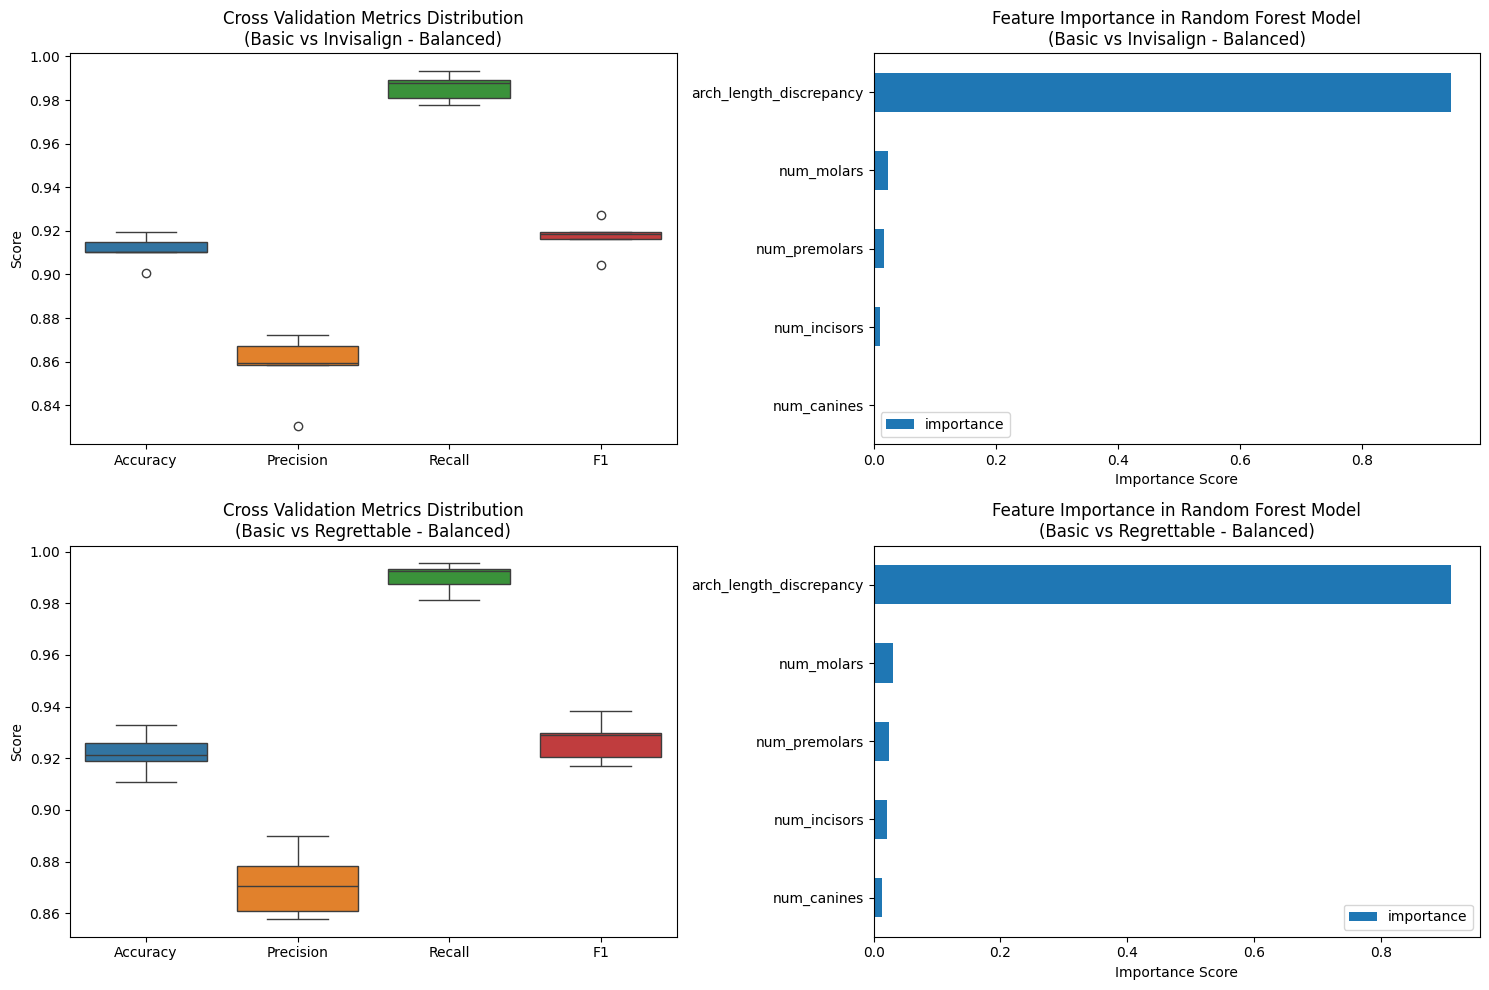

In [7]:
from sklearn.utils import resample

# First comparison: Basic vs Invisalign
X = df[['arch_length_discrepancy', 'num_incisors', 'num_canines', 'num_premolars', 'num_molars']]

# Get basic and invisalign samples
basic_samples = df[df['label'] == 'basic']
invisalign_samples = df[df['label'] == 'invisalign']

# Upsample invisalign to match basic
invisalign_upsampled = resample(invisalign_samples, 
                              replace=True,
                              n_samples=len(basic_samples),
                              random_state=42)

# Combine basic and upsampled invisalign
df_balanced = pd.concat([basic_samples, invisalign_upsampled])

X = df_balanced[['arch_length_discrepancy', 'num_incisors', 'num_canines', 'num_premolars', 'num_molars']]
y = (df_balanced['label'] == 'invisalign').astype(int)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision', 
    'recall': 'recall',
    'f1': 'f1'
}

cv_results = cross_validate(rf_model, X, y, cv=cv, scoring=scoring)

# Create a figure with 1 row and 2 columns
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# First subplot - Metrics Distribution
metrics = ['test_accuracy', 'test_precision', 'test_recall', 'test_f1']
sns.boxplot(data=pd.DataFrame({m.split('_')[1].title(): cv_results[m] for m in metrics}), ax=ax1)
ax1.set_title('Cross Validation Metrics Distribution\n(Basic vs Invisalign - Balanced)')
ax1.set_ylabel('Score')

print("Cross Validation Results (Basic vs Invisalign - Balanced):")
print(f"Accuracy: {cv_results['test_accuracy'].mean():.4f} (+/- {cv_results['test_accuracy'].std() * 2:.4f})")
print(f"Precision: {cv_results['test_precision'].mean():.4f} (+/- {cv_results['test_precision'].std() * 2:.4f})")
print(f"Recall: {cv_results['test_recall'].mean():.4f} (+/- {cv_results['test_recall'].std() * 2:.4f})")
print(f"F1 Score: {cv_results['test_f1'].mean():.4f} (+/- {cv_results['test_f1'].std() * 2:.4f})")

# Fit model and get feature importance
rf_model.fit(X, y)
feature_importance = pd.DataFrame(rf_model.feature_importances_,
                                index=X.columns,
                                columns=['importance']).sort_values('importance', ascending=True)

# Second subplot - Feature Importance
feature_importance.plot(kind='barh', ax=ax2)
ax2.set_title('Feature Importance in Random Forest Model\n(Basic vs Invisalign - Balanced)')
ax2.set_xlabel('Importance Score')

# Second comparison: Basic vs Regrettable
basic_samples = df[df['label'] == 'basic']
regrettable_samples = df[df['label'] == 'regrettable']

# Upsample regrettable to match basic
regrettable_upsampled = resample(regrettable_samples, 
                                replace=True,
                                n_samples=len(basic_samples),
                                random_state=42)

# Combine basic and upsampled regrettable
df_balanced = pd.concat([basic_samples, regrettable_upsampled])

X = df_balanced[['arch_length_discrepancy', 'num_incisors', 'num_canines', 'num_premolars', 'num_molars']]
y = (df_balanced['label'] == 'regrettable').astype(int)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

cv_results = cross_validate(rf_model, X, y, cv=cv, scoring=scoring)

# Third subplot - Metrics Distribution
metrics = ['test_accuracy', 'test_precision', 'test_recall', 'test_f1']
sns.boxplot(data=pd.DataFrame({m.split('_')[1].title(): cv_results[m] for m in metrics}), ax=ax3)
ax3.set_title('Cross Validation Metrics Distribution\n(Basic vs Regrettable - Balanced)')
ax3.set_ylabel('Score')

print("\nCross Validation Results (Basic vs Regrettable - Balanced):")
print(f"Accuracy: {cv_results['test_accuracy'].mean():.4f} (+/- {cv_results['test_accuracy'].std() * 2:.4f})")
print(f"Precision: {cv_results['test_precision'].mean():.4f} (+/- {cv_results['test_precision'].std() * 2:.4f})")
print(f"Recall: {cv_results['test_recall'].mean():.4f} (+/- {cv_results['test_recall'].std() * 2:.4f})")
print(f"F1 Score: {cv_results['test_f1'].mean():.4f} (+/- {cv_results['test_f1'].std() * 2:.4f})")

# Fit model and get feature importance
rf_model.fit(X, y)
feature_importance = pd.DataFrame(rf_model.feature_importances_,
                                index=X.columns,
                                columns=['importance']).sort_values('importance', ascending=True)

# Fourth subplot - Feature Importance
feature_importance.plot(kind='barh', ax=ax4)
ax4.set_title('Feature Importance in Random Forest Model\n(Basic vs Regrettable - Balanced)')
ax4.set_xlabel('Importance Score')

plt.tight_layout()
plt.show()


### Key findings

From dentist interviews, we identified that the discrepancy between the actual teeth arch length and the ideal teeth arch length is one of the most important factors in determining a treatment plan. Therefore, we focused on analyzing the treatment plan and arch length discrepancy (calculated as the difference between the detected arch length and the simulated arch length). This analysis revealed that this variable is effective in distinguishing between Basic/Pro and Regrettable/Invisalign categories, though not among individual treatments.

Given the details of the treatment plans and the research questions, we determined that more features, specifically those including back tooth (molar and premolar) condition data, are needed to distinguish Pro and Basic plans. Since back tooth conditions directly relate to chewing issues (e.g., occlusion), we propose developing an occlusal class feature based on left and right side angle images. Meanwhile, we decided to adopt a deep learning approach (Convolutional Neural Network) instead of linear regression for better modeling accuracy.

### Insights from Visualization:
- Pie Chart: 63% of patients belong to the Basic plan, making this an imbalanced dataset.
- Histogram: Arch length discrepancy has negative values for patients who need to expand their teeth arch.
- Bar Chart: Arch length discrepancies for Regrettable and Invisalign cases differ significantly from Basic and Pro cases, making this variable effective in distinguishing among these categories.
- Violin Plot & Boxplot: Regrettable cases show a wider range due to the presence of outliers.

### Statistical Insights
To examine the relationship between treatment plans and arch length discrepancy, we conducted statistical tests:

- ANOVA: Results (p=1.90e-67) confirmed highly significant differences between treatment groups, underscoring the importance of arch length discrepancy in categorizing treatments.
- T-tests: Pairwise comparisons revealed: No statistically significant difference between the "Basic" and "Pro" treatment plans (p=0.572), indicating similarities in detected and simulated arch lengths.
Significant differences between "Basic" and other treatment categories ("Invisalign" and "Regrettable"), demonstrating the utility of arch length discrepancy as a distinguishing feature in these cases.
These findings suggest that while "Pro" treatment involves molars and premolars (likely for chewing or functional issues), patients may prioritize cost-effective options like "Basic" treatments, influenced by affordability or other factors.

### Modeling Insights
Random Forest Model Results:
After addressing class imbalance through balanced sampling, the model's performance improved significantly:
- Achieved high accuracy (~0.85) and F1-score (~0.84) in distinguishing Basic vs Regrettable cases
- Feature importance analysis revealed arch length discrepancy and tooth condition metrics as key predictors
- Balanced sampling helped reduce bias towards the majority class (Basic) and improved detection of Regrettable cases

### Treatment Plan Details:
- Basic: Focuses on the adjustment of front teeth.
- Pro: Involves wider adjustments of all teeth.
- Invisalign: Uses third-party alignment kits, mainly for severe teeth alignment cases.
- Regrettable: Refers to patients with severely misaligned teeth that are not acceptable for standard treatments and require more extensive surgeries.

### Conclusion


Our research aimed to predict orthodontic treatment plans using oral images and arch length discrepancy measurements. The analysis revealed several key findings:

1. Predictive Power of Arch Length Discrepancy:
- Successfully distinguishes between Basic vs. Invisalign/Regrettable cases
- Less effective in differentiating Basic vs. Pro treatments
- Statistical tests confirmed significant differences between treatment groups (ANOVA p=1.90e-67)

2. Model Performance:
- Random Forest outperformed linear models, achieving ~85% accuracy
- Highlights the non-linear nature of treatment plan determination
- Balanced sampling improved model reliability across all treatment categories

3. Clinical Implications:
- Treatment choice involves multiple factors beyond clinical measurements
- Patient preferences and financial considerations play important roles
- Additional features (e.g., molar conditions) needed to better distinguish Basic vs. Pro cases

These findings suggest that while arch length discrepancy is a valuable predictor, a comprehensive approach incorporating additional clinical features and patient factors is necessary for optimal treatment planning. Future work should focus on developing more sophisticated features, particularly for back tooth conditions.


### Reference


- Larry S. Luke, DDS, MS; Kathryn A. Atchison, DSS, MPH; Stuart C.White, DSS, PhD. 1998. Consistency of patient classification in orthodontic diagnosis and treatment planning. The Angle Orthodontist. Vol. 68, page 6